In [1]:
# Bagged Decision Trees for Classification
import pandas as pd
from sklearn import preprocessing
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing data
data = pd.read_csv('Fraud_check.csv')
#filename = 'Fraud_check.csv'

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.rename(columns = {'Taxable.Income':'Income'}, inplace = True)

In [5]:
data.rename(columns = {'Marital.Status':'Status'}, inplace = True)

In [6]:
data.rename(columns = {'City.Population':'Population'}, inplace = True)

In [7]:
data.rename(columns = {'Work.Experience':'Experience'}, inplace = True)

# Converting categorical data to numeric data & numeric data to categorical data

In [8]:
#Complete dataset
label_encoder = preprocessing.LabelEncoder()

In [9]:
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

In [10]:
data['Status']= label_encoder.fit_transform(data['Status']) 

In [11]:
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [12]:
data = pd.DataFrame(data)

In [13]:
data.head()

,Undergrad,Status,Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Undergrad   600 non-null    int32
 1   Status      600 non-null    int32
 2   Income      600 non-null    int64
 3   Population  600 non-null    int64
 4   Experience  600 non-null    int64
 5   Urban       600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


<AxesSubplot:>

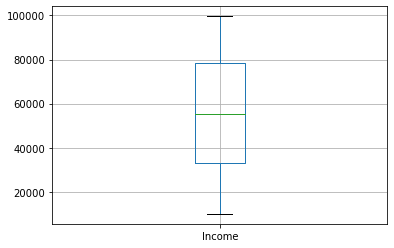

In [15]:
data.boxplot(column= ['Income'])

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

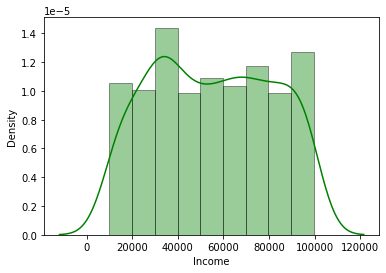

In [16]:
import seaborn as sns
sns.distplot(data['Income'], color='green',hist_kws =dict(edgecolor = 'black'))

In [17]:
def change_func(x):
    if x <= 30000:
        return "Risky"
    else:
        return "Good"

data["Income"] = data["Income"].apply(lambda x: change_func(x))

In [18]:
data.head()

,Undergrad,Status,Income,Population,Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


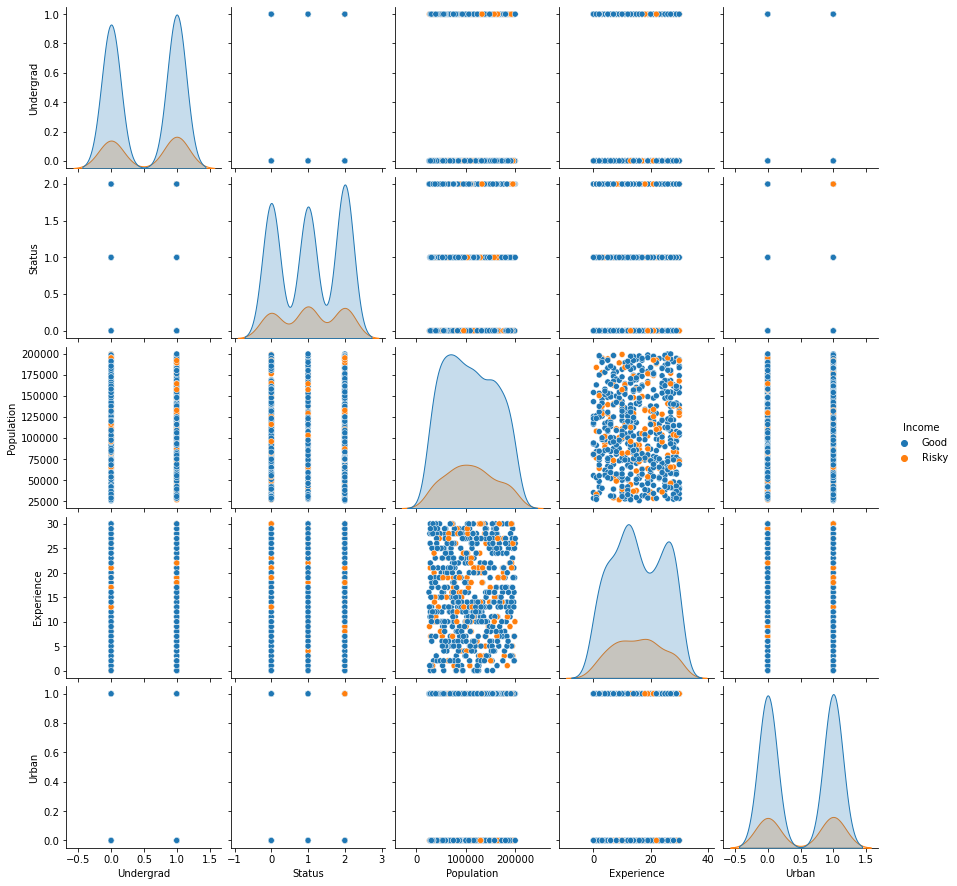

In [20]:
# Pair plot to visualise all the attributes at once
sns.pairplot(data=data, hue = 'Income')

In [21]:
data = data.reindex(columns=['Undergrad','Urban', 'Status','Experience','Population','Income'])
data.head()

,Undergrad,Urban,Status,Experience,Population,Income
0,0,1,2,10,50047,Good
1,1,1,0,18,134075,Good
2,0,1,1,30,160205,Good
3,1,1,2,15,193264,Good
4,0,0,1,28,27533,Good


# Random Forest

In [22]:
array = data.values

In [23]:
X = array[:,:5]
Y = array[:,-1]

In [24]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [25]:
model = RandomForestClassifier(n_estimators=100, max_features=3).fit(X, Y)
#n_estimators = No. of trees

In [26]:
results = cross_val_score(model, X, Y, cv=kfold)

In [27]:
print((results.mean())*100)

74.16666666666666


In [28]:
model.predict(X)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [29]:
model.feature_importances_

array([0.04828467, 0.04874592, 0.07830279, 0.27059282, 0.55407379])

In [30]:
df=data[data.columns.difference(['Income'])]
listed=list(df.columns)
listed

['Experience', 'Population', 'Status', 'Undergrad', 'Urban']

In [31]:
features = pd.Series(model.feature_importances_,index=listed).sort_values(ascending=False)

No handles with labels found to put in legend.


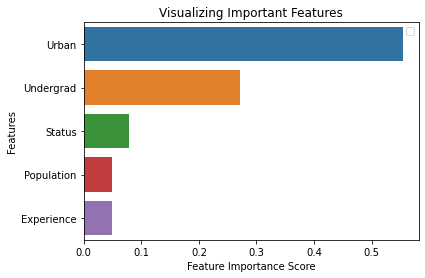

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=features, y=features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()